In [ ]:
# Shows how FFT work by removing noise and reconstruct the signal cleanly.

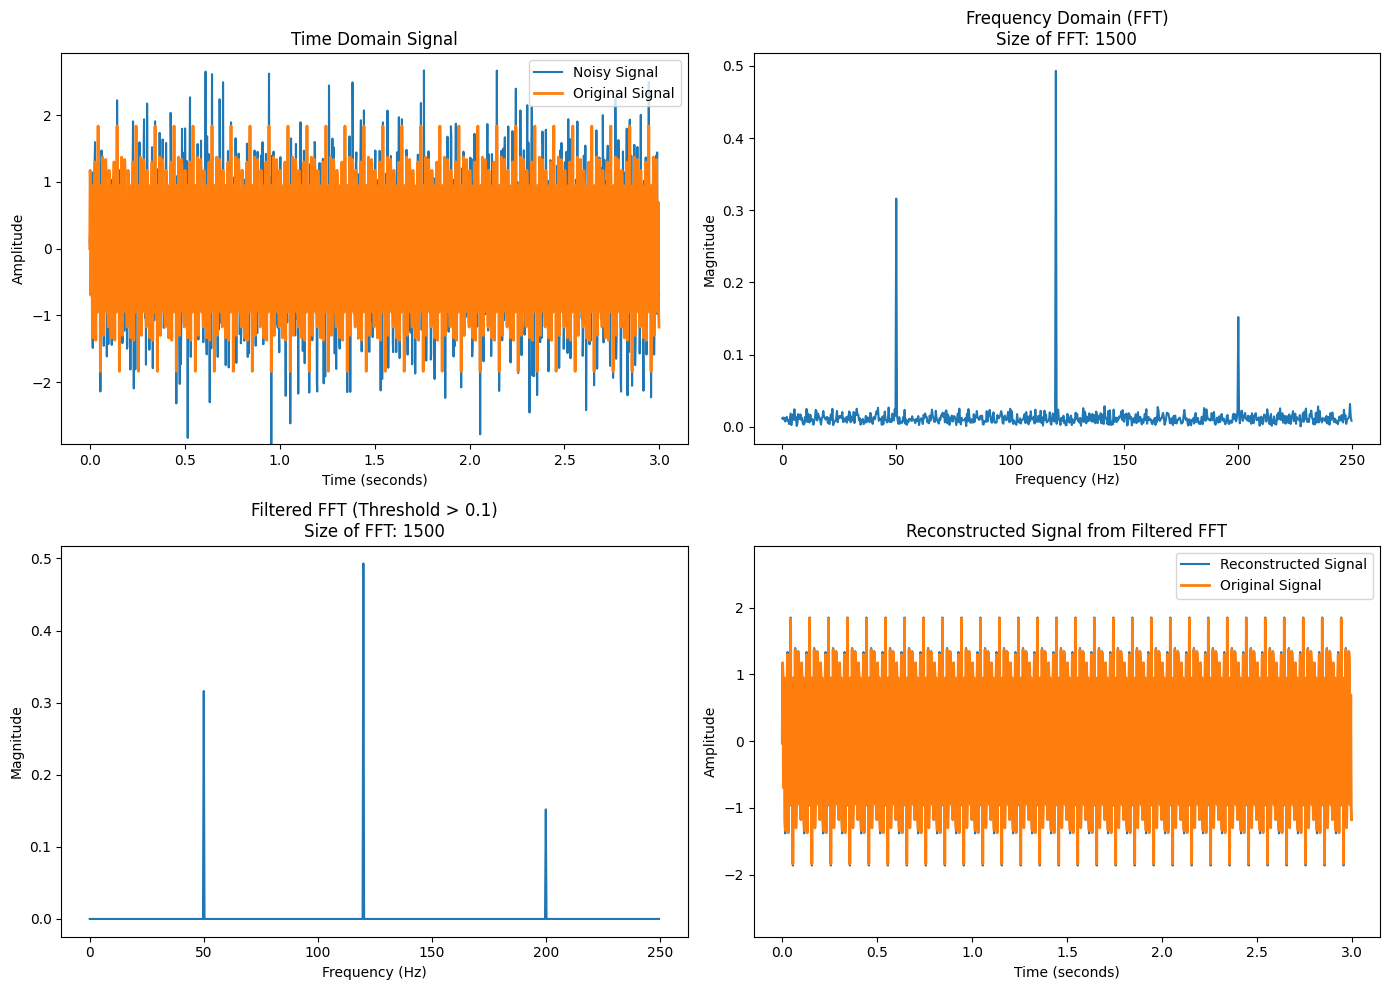

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
Fs = 500  # Sampling frequency (samples per second)
T = 1/Fs  # Sampling period (seconds per sample)
L = 1500  # Length of signal
t = np.arange(0, L) * T  # Time vector

# Create a signal composed of multiple sine waves
f1 = 50   # Frequency of the first sine wave
f2 = 120  # Frequency of the second sine wave
f3 = 300  # Frequency of the third sine wave
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 1.0 * np.sin(2 * np.pi * f2 * t) + 0.3 * np.sin(2 * np.pi * f3 * t)

# Add some noise to the signal
noise = 0.5 * np.random.normal(size=t.shape)
signal_noisy = signal + noise

# Compute the FFT
signal_fft = np.fft.fft(signal_noisy)
frequencies = np.fft.fftfreq(L, T)

# Take the magnitude of the FFT and only keep the positive frequencies
signal_magnitude = np.abs(signal_fft / L)
frequencies = frequencies[:L//2]
signal_magnitude = signal_magnitude[:L//2]

# Filter the FFT by setting values with magnitude less than 0.1 to zero
threshold = 0.1
filtered_fft = np.copy(signal_fft)
filtered_fft[np.abs(signal_fft / L) < threshold] = 0

# Reconstruct the signal using the filtered FFT
reconstructed_signal = np.fft.ifft(filtered_fft)

# Calculate the maximum amplitude for fixed scaling
max_amplitude = max(np.max(np.abs(signal_noisy)), np.max(np.abs(signal)))

# Plot the original signal
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(t, signal_noisy, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.ylim([-max_amplitude, max_amplitude])
plt.title('Time Domain Signal')
plt.legend()

# Plot the FFT magnitude
plt.subplot(2, 2, 2)
plt.plot(frequencies, signal_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Frequency Domain (FFT)\nSize of FFT: {len(signal_fft)}')

# Plot the filtered FFT magnitude
filtered_magnitude = np.abs(filtered_fft / L)[:L//2]
plt.subplot(2, 2, 3)
plt.plot(frequencies, filtered_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Filtered FFT (Threshold > {threshold})\nSize of FFT: {len(filtered_fft)}')

# Plot the reconstructed signal
plt.subplot(2, 2, 4)
plt.plot(t, np.real(reconstructed_signal), label='Reconstructed Signal')
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.ylim([-max_amplitude, max_amplitude])
plt.title('Reconstructed Signal from Filtered FFT')
plt.legend()

plt.tight_layout()
plt.show()
